In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import numpy as np
import tensorflow as tf

from edward.models import Bernoulli, Normal, Categorical, Dirichlet, Uniform, Multinomial, Empirical
from edward.util import Progbar

In [57]:
N=1000
x0 = 50.

In [78]:
mu = Normal(mu=tf.constant(0.),sigma=tf.constant(10.))
samples = Normal(mu=tf.ones(N)*mu,sigma=tf.ones(N)*tf.constant(1.))

In [86]:
data = np.random.randn(N)+x0
data_msked = np.ma.masked_where(np.random.rand(N)>0.9,data)

In [96]:
samp_known = tf.boolean_mask(samples,np.logical_not(data_msked.mask))
samp_unk = tf.boolean_mask(samples,data_msked.mask)
len_unk = data[data_msked.mask].shape[0]

qmu = Normal(mu=tf.Variable(tf.constant(0.)),sigma=tf.exp(tf.Variable(tf.constant(10.))))
qS = Normal(mu=tf.Variable(tf.ones(len_unk)*tf.constant(0.)),sigma=tf.exp(tf.Variable(tf.ones(len_unk)*tf.constant(10.))))


inf = ed.KLpq({mu:qmu,samp_unk:qS},{samp_known:data[np.logical_not(data_msked.mask)]})

In [97]:
inf.run()

AttributeError: 'Tensor' object has no attribute 'log_prob'

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  3.,   8.,   8.,  20.,  17.,  24.,   8.,   6.,   4.,   2.]),
 array([-2837.95410156, -2234.50571289, -1631.05732422, -1027.60893555,
         -424.16054687,   179.2878418 ,   782.73623047,  1386.18461914,
         1989.63300781,  2593.08139648,  3196.52978516]),
 <a list of 10 Patch objects>)

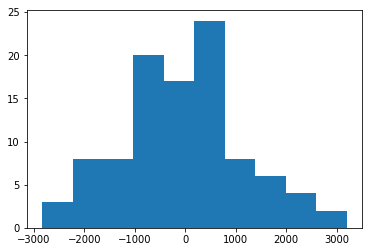

In [83]:
plt.hist(qmu.sample(100).eval())

In [56]:
data

array([ 48.94275079,  50.15736802,  49.86353543,  50.3709001 ,
        50.44308505,  50.19460011,  51.06247843,  46.97422276,
        49.18876472,  50.24956877,  50.26407199,  48.70361715,
        48.24931944,  49.29213403,  50.17886314,  50.33399499,
        49.4741228 ,  49.49025751,  51.56236495,  49.89992297,
        50.22544849,  50.98838688,  50.64604496,  49.7264316 ,
        47.82076491,  49.22019847,  49.02354087,  51.00816023,
        49.63314841,  51.57478822,  50.41719546,  49.23864608,
        50.84006085,  50.818026  ,  48.45622184,  51.57232688,
        49.40277859,  50.98350071,  49.13245487,  49.50820288,
        48.72515627,  50.89353977,  50.7155617 ,  49.77344023,
        50.32127145,  51.32725526,  51.31414252,  49.46343267,
        49.34730089,  50.91932477,  49.93039964,  50.84746858,
        52.29829449,  48.4735253 ,  50.10388515,  50.1615322 ,
        50.35620396,  50.08509907,  49.60938435,  49.81100537,
        48.92802113,  51.50925481,  49.30315006,  51.03

In [95]:
len_unk

117

In [98]:
mu

<ed.RandomVariable 'Normal_28/' shape=() dtype=float32>